# 1. **Dataset Analysis,EDA and model development**

**Original Dataset**: https://drive.google.com/file/d/18TOHEtRQenraMzq63FtV0qXXbvJ0y7J9/view?usp=drive_link

**Information about dataset and column discriptions**: https://colab.research.google.com/drive/1dUJ0Y0R8RJb_8cIFeOXcFoLv4ech8e-n?usp=drive_link


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Updated_Anxiety_Dataset.csv')
df.head().T

,0,1,2,3,4
Age,50,30,42,59,57
SleepDuration,8.3,6.7,8.4,4.8,7.8
Genotype_5HTTLPR,Short/Short,Short/Short,Short/Long,Short/Short,Short/Long
Genotype_COMT,Met/Met,Val/Val,Val/Val,Val/Met,Val/Val
Genotype_MAOA,Low Activity,High Activity,Low Activity,Low Activity,Low Activity
Cortisol,20.7,7.6,18.2,14.1,23.0
Alpha_Amylase,98.6,114.2,151.2,81.5,113.1
HRV (Heart Rate Variability),93.2,53.8,82.4,63.6,47.1
GABA,0.88,0.89,1.5,0.8,1.32
IL6,0.92,3.99,4.95,2.44,0.89


In [ ]:
#checking shape
df.shape

(1000, 19)

In [ ]:
#value counts of target column
df["AnxietyDiagnosis"].value_counts()

,count
AnxietyDiagnosis,
False,500
Agoraphobia,110
Panic Disorder,103
Social Anxiety Disorder,97
Specific Phobia,96
Generalized Anxiety Disorder,94


Theres a class imbalance in the dataset. Dropping some columns form the dataset to ensure accuracyand prediction are precise

In [ ]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   SleepDuration                 1000 non-null   float64
 2   Genotype_5HTTLPR              1000 non-null   object 
 3   Genotype_COMT                 1000 non-null   object 
 4   Genotype_MAOA                 1000 non-null   object 
 5   Cortisol                      1000 non-null   float64
 6   Alpha_Amylase                 1000 non-null   float64
 7   HRV (Heart Rate Variability)  1000 non-null   float64
 8   GABA                          1000 non-null   float64
 9   IL6                           1000 non-null   float64
 10  TNF_alpha                     1000 non-null   float64
 11  Tryptophan                    1000 non-null   float64
 12  Vitamin_B6                    1000 non-null   float64
 13  Omeg

In [ ]:
#checking null/empty values
df.isna().sum()

,0
Age,0
SleepDuration,0
Genotype_5HTTLPR,0
Genotype_COMT,0
Genotype_MAOA,0
Cortisol,0
Alpha_Amylase,0
HRV (Heart Rate Variability),0
GABA,0
IL6,0


In [ ]:
#checking datatype of column
df['Genotype_MAOA'].dtype

dtype('O')

In [ ]:
pd.api.types.is_object_dtype(df["Genotype_MAOA"])

True

In [ ]:
#Finding the columns which contains string in our dataset
for label,content in df.items():
  if pd.api.types.is_object_dtype(content):
    print(label)

Genotype_5HTTLPR
Genotype_COMT
Genotype_MAOA
AnxietyDiagnosis


In [ ]:
# converting strings to category format
for label,content in df.items():
  if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
    df[label]=content.astype("category").cat.as_ordered()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           1000 non-null   int64   
 1   SleepDuration                 1000 non-null   float64 
 2   Genotype_5HTTLPR              1000 non-null   category
 3   Genotype_COMT                 1000 non-null   category
 4   Genotype_MAOA                 1000 non-null   category
 5   Cortisol                      1000 non-null   float64 
 6   Alpha_Amylase                 1000 non-null   float64 
 7   HRV (Heart Rate Variability)  1000 non-null   float64 
 8   GABA                          1000 non-null   float64 
 9   IL6                           1000 non-null   float64 
 10  TNF_alpha                     1000 non-null   float64 
 11  Tryptophan                    1000 non-null   float64 
 12  Vitamin_B6                    1000 non-null   flo

In [ ]:
#creating new column with numerical codes for all string columns

# Making New Colums
df['Genotype_5HTTLPR_Codes']=df['Genotype_5HTTLPR'].cat.codes
df['Genotype_COMT_Codes']=df['Genotype_COMT'].cat.codes
df['Genotype_MAOA_Codes']=df['Genotype_MAOA'].cat.codes
df['AnxietyDiagnosis_Codes']=df['AnxietyDiagnosis'].cat.codes

# Droping the original string colum
df=df.drop('Genotype_5HTTLPR',axis=1)
df=df.drop('Genotype_COMT',axis=1)
df=df.drop('Genotype_MAOA',axis=1)
df=df.drop('AnxietyDiagnosis',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   SleepDuration                 1000 non-null   float64
 2   Cortisol                      1000 non-null   float64
 3   Alpha_Amylase                 1000 non-null   float64
 4   HRV (Heart Rate Variability)  1000 non-null   float64
 5   GABA                          1000 non-null   float64
 6   IL6                           1000 non-null   float64
 7   TNF_alpha                     1000 non-null   float64
 8   Tryptophan                    1000 non-null   float64
 9   Vitamin_B6                    1000 non-null   float64
 10  Omega3_Index                  1000 non-null   float64
 11  HPA_Axis_Dysregulation        1000 non-null   float64
 12  Sympathetic_Activation_Score  1000 non-null   float64
 13  GABA

In [ ]:
df.head().T

,0,1,2,3,4
Age,50.00,30.00,42.00,59.00,57.00
SleepDuration,8.30,6.70,8.40,4.80,7.80
Cortisol,20.70,7.60,18.20,14.10,23.00
Alpha_Amylase,98.60,114.20,151.20,81.50,113.10
HRV (Heart Rate Variability),93.20,53.80,82.40,63.60,47.10
GABA,0.88,0.89,1.50,0.80,1.32
IL6,0.92,3.99,4.95,2.44,0.89
TNF_alpha,1.06,1.61,3.85,2.08,1.72
Tryptophan,53.70,65.20,49.70,38.00,59.00
Vitamin_B6,23.90,30.00,12.30,14.60,18.30


In [ ]:
# Save to Colab's temporary storage
df.to_csv('modified_Anxiety.csv', index=False)

In [ ]:
df=pd.read_csv('modified_Anxiety.csv')
df.head()

,Age,SleepDuration,Cortisol,Alpha_Amylase,HRV (Heart Rate Variability),GABA,IL6,TNF_alpha,Tryptophan,Vitamin_B6,Omega3_Index,HPA_Axis_Dysregulation,Sympathetic_Activation_Score,GABAergic_Function_Score,AnxietyScore_GAD7,Genotype_5HTTLPR_Codes,Genotype_COMT_Codes,Genotype_MAOA_Codes,AnxietyDiagnosis_Codes
0,50,8.3,20.7,98.6,93.2,0.88,0.92,1.06,53.7,23.9,6.52,0.44,0.74,0.63,6,2,0,1,1
1,30,6.7,7.6,114.2,53.8,0.89,3.99,1.61,65.2,30.0,4.16,0.52,0.02,0.22,8,2,2,0,1
2,42,8.4,18.2,151.2,82.4,1.50,4.95,3.85,49.7,12.3,9.88,0.81,0.68,0.25,4,1,2,1,1
3,59,4.8,14.1,81.5,63.6,0.80,2.44,2.08,38.0,14.6,2.57,0.66,0.82,0.79,11,2,1,1,4
4,57,7.8,23.0,113.1,47.1,1.32,0.89,1.72,59.0,18.3,5.58,0.19,0.53,0.69,1,1,2,1,1


### **Random Forest, Logistic Regression and KNN**
Accuracy is as followed:

* 'Random Forest': `0.510`
* 'Logistic Regression': `0.505`
* 'KNN': `0.405`





In [ ]:
import numpy as np

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
# Splitting the dataset
X=df.drop("AnxietyDiagnosis_Codes",axis=1)
y=df["AnxietyDiagnosis_Codes"]

np.random.seed(42)
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#Using three ML models
models={"Random Forest":RandomForestClassifier(),
        "Logistic Regression":LogisticRegression(max_iter=200),
        "KNN":KNeighborsClassifier()}

#function to fit and score matrix

def fit_and_score(models,X_train,X_test,y_train,y_test):
  """
    Fits and evaluates given machine learning models
    models:a dictionary of different scikit-learn models
    X_train:Trainnig data (No labels)
    X_test:Testing data (No Labels)
    y_train:trainning labels
    y_test:test labels

  """

  #setting up a randomseed(42)
  np.random.seed(42)

  #dictionary for storing models score
  model_scores={}
  # Dictionary to store trained models so we can make predictions later
  fitted_models = {}

  #looping throigh each model
  for name,model in models.items():
    # fit the model to data
    model.fit(X_train,y_train)
    # Store the fitted model
    fitted_models[name] = model

    #evaluate model and append score
    model_scores[name]=model.score(X_test,y_test)

  # Return both scores and the fitted models
  return model_scores, fitted_models

In [ ]:
model_scores, fitted_models = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.51, 'Logistic Regression': 0.5, 'KNN': 0.405}

In [ ]:
random_forest_model = fitted_models["Random Forest"]
y_preds = random_forest_model.predict(X_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.51      1.00      0.68       101
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        22
           4       0.50      0.05      0.09        20
           5       0.00      0.00      0.00        18

    accuracy                           0.51       200
   macro avg       0.17      0.18      0.13       200
weighted avg       0.31      0.51      0.35       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Step 1: Load dataset
a = pd.read_csv("/content/Updated_Anxiety_Dataset.csv")

In [ ]:
# Step 2: Encode target label
target_col = "AnxietyDiagnosis"
label_encoder = LabelEncoder()
a[target_col] = label_encoder.fit_transform(a[target_col])

In [ ]:
# Step 3: Separate features and target
X = a.drop(target_col, axis=1)
y = a[target_col]

In [ ]:
# Step 4: Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Step 5: Preprocessing for categorical variables
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

In [ ]:
# Step 6: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Step 7: Create pipeline with SMOTE and model
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Step 8: Train the model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genotype_5HTTLPR',
                                                   'Genotype_COMT',
                                                   'Genotype_MAOA'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Save the best model using joblib
import joblib

# Install joblib if you haven't already
!pip install joblib

joblib.dump(pipeline, "AnxietyModel.joblib")

['AnxietyModel.joblib']

In [ ]:
#To load the model later:
anxiety_model = joblib.load("/content/AnxietyModel.joblib")

In [ ]:
# Step 9: Evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.42


## Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('Updated_Anxiety_Dataset.csv')

# Convert string columns to categorical ordered format
for label, content in df.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

# Save mappings from category codes to original strings
category_mappings = {
    'Genotype_5HTTLPR': dict(enumerate(df['Genotype_5HTTLPR'].cat.categories)),
    'Genotype_COMT': dict(enumerate(df['Genotype_COMT'].cat.categories)),
    'Genotype_MAOA': dict(enumerate(df['Genotype_MAOA'].cat.categories)),
    'AnxietyDiagnosis': dict(enumerate(df['AnxietyDiagnosis'].cat.categories))
}

# Create new columns with codes for categorical data
df['Genotype_5HTTLPR_Codes'] = df['Genotype_5HTTLPR'].cat.codes
df['Genotype_COMT_Codes'] = df['Genotype_COMT'].cat.codes
df['Genotype_MAOA_Codes'] = df['Genotype_MAOA'].cat.codes
df['AnxietyDiagnosis_Codes'] = df['AnxietyDiagnosis'].cat.codes

# Drop original string columns
df = df.drop(['Genotype_5HTTLPR', 'Genotype_COMT', 'Genotype_MAOA', 'AnxietyDiagnosis'], axis=1)

# Define features and target
X = df.drop('AnxietyDiagnosis_Codes', axis=1)
y = df['AnxietyDiagnosis_Codes']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# User input function
def predict_anxiety():
    print("\nPlease enter the following details to predict the type of Anxiety Disorder:\n")
    user_input = {}

    for col in X.columns:
        if "Genotype" in col:
            original_col = col.replace("_Codes", "")
            options = list(category_mappings[original_col].values())
            print(f"{original_col} options: {options}")
            val = input(f"Enter {original_col}: ")
            while val not in options:
                print("Invalid input. Please choose from the given options.")
                val = input(f"Enter {original_col}: ")
            # Convert string to code
            code = list(category_mappings[original_col].keys())[options.index(val)]
            user_input[col] = code
        else:
            while True:
                try:
                    val = float(input(f"Enter {col}: "))
                    user_input[col] = val
                    break
                except ValueError:
                    print("Invalid number. Try again.")

    # Convert input to DataFrame
    input_df = pd.DataFrame([user_input])

    # Make prediction
    prediction_code = model.predict(input_df)[0]
    prediction_label = category_mappings['AnxietyDiagnosis'][prediction_code]

    print("\n🎯 Predicted Anxiety Diagnosis:", prediction_label)
    return prediction_label


In [ ]:
predict_anxiety()


Please enter the following details to predict the type of Anxiety Disorder:

Enter Age: 45
Enter SleepDuration: 22
Enter Cortisol: 33


KeyboardInterrupt: Interrupted by user

### **SMOTE**
Accuracy is `0.42`

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# Step 1: Load dataset
df = pd.read_csv("/content/Updated_Anxiety_Dataset.csv")

In [ ]:
df.head()

,Age,SleepDuration,Genotype_5HTTLPR,Genotype_COMT,Genotype_MAOA,Cortisol,Alpha_Amylase,HRV (Heart Rate Variability),GABA,IL6,TNF_alpha,Tryptophan,Vitamin_B6,Omega3_Index,HPA_Axis_Dysregulation,Sympathetic_Activation_Score,GABAergic_Function_Score,AnxietyScore_GAD7,AnxietyDiagnosis
0,50,8.3,Short/Short,Met/Met,Low Activity,20.7,98.6,93.2,0.88,0.92,1.06,53.7,23.9,6.52,0.44,0.74,0.63,6,False
1,30,6.7,Short/Short,Val/Val,High Activity,7.6,114.2,53.8,0.89,3.99,1.61,65.2,30.0,4.16,0.52,0.02,0.22,8,False
2,42,8.4,Short/Long,Val/Val,Low Activity,18.2,151.2,82.4,1.50,4.95,3.85,49.7,12.3,9.88,0.81,0.68,0.25,4,False
3,59,4.8,Short/Short,Val/Met,Low Activity,14.1,81.5,63.6,0.80,2.44,2.08,38.0,14.6,2.57,0.66,0.82,0.79,11,Social Anxiety Disorder
4,57,7.8,Short/Long,Val/Val,Low Activity,23.0,113.1,47.1,1.32,0.89,1.72,59.0,18.3,5.58,0.19,0.53,0.69,1,False


In [ ]:
# Step 2: Encode target label
target_col = "AnxietyDiagnosis"
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

In [ ]:
# Step 3: Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

In [ ]:
# Step 4: Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Step 5: Preprocessing for categorical variables
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

In [ ]:
# Step 6: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Step 7: Create pipeline with SMOTE and model
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Step 8: Train the model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genotype_5HTTLPR',
                                                   'Genotype_COMT',
                                                   'Genotype_MAOA'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Step 9: Evaluate on test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
# Step 10: Predict a sample
sample = X.iloc[[0]]
predicted_class = pipeline.predict(sample)
predicted_label = label_encoder.inverse_transform(predicted_class)

In [ ]:
accuracy

0.42

In [ ]:
report

'                              precision    recall  f1-score   support\n\n                 Agoraphobia       0.18      0.09      0.12        22\n                       False       0.49      0.81      0.61       100\nGeneralized Anxiety Disorder       0.25      0.05      0.09        19\n              Panic Disorder       0.00      0.00      0.00        21\n     Social Anxiety Disorder       0.00      0.00      0.00        19\n             Specific Phobia       0.00      0.00      0.00        19\n\n                    accuracy                           0.42       200\n                   macro avg       0.15      0.16      0.14       200\n                weighted avg       0.29      0.42      0.33       200\n'

In [ ]:
predicted_label[0]

'False'

### **XGBoost**

Accuracy : `0.395`

In [ ]:
!pip install imbalanced-learn xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
# Load your data
df = pd.read_csv("/content/Updated_Anxiety_Dataset.csv")

In [ ]:
# Separate features and target
X = df.drop("AnxietyDiagnosis", axis=1)
y = df["AnxietyDiagnosis"]

In [ ]:
# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Preprocessing
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [ ]:
# Full pipeline with feature selection, SMOTE, and XGBoost
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

In [ ]:
# Hyperparameter space
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Randomized Search
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
# Train
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:29:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'SleepDuration',
                                                                                'Cortisol',
                                                                                'Alpha_Amylase',
                                                                                'HRV '
                                                                                '(Heart '
                                                                                'Rate '
                                                                                'Variability)',
                                                                                'GABA',
                                                                                'IL6',
                                                                                'TNF_alpha',
                                                                                'Tryptophan',
                                                                                'Vitamin_B6',
                                                                                'Omega3_Index',
                                                                                'HPA_Axis_Dysregulation',
                                                                                'Sympathetic_Activation_Score',
                                                                                'GABAergic_Function_Sc...
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.8,
                                                                         1],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.3],
                                        'classifier__max_depth': [3, 5, 7],
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'classifier__subsample': [0.8, 1]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Predict
y_pred = search.best_estimator_.predict(X_test)

In [ ]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
print(f"Best Accuracy: {accuracy:.3f}")
print(report)

Best Accuracy: 0.395
                              precision    recall  f1-score   support

                 Agoraphobia       0.25      0.14      0.18        22
                       False       0.52      0.73      0.61       100
Generalized Anxiety Disorder       0.12      0.11      0.11        19
              Panic Disorder       0.00      0.00      0.00        21
     Social Anxiety Disorder       0.07      0.05      0.06        19
             Specific Phobia       0.00      0.00      0.00        19

                    accuracy                           0.40       200
                   macro avg       0.16      0.17      0.16       200
                weighted avg       0.31      0.40      0.34       200



# Random Forest

Accuracy: 0.15  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Load dataset
df = pd.read_csv("balanced_anxiety_dataset.csv")

# Features and target
X = df.drop("AnxietyDiagnosis", axis=1)
y = df["AnxietyDiagnosis"]

In [ ]:
# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [ ]:
# Full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
# Train
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'SleepDuration',
                                                   'Cortisol', 'Alpha_Amylase',
                                                   'HRV (Heart Rate '
                                                   'Variability)',
                                                   'GABA', 'IL6', 'TNF_alpha',
                                                   'Tryptophan', 'Vitamin_B6',
                                                   'Omega3_Index',
                                                   'HPA_Axis_Dysregulation',
                                                   'Sympathetic_Activation_Score',
                                                   'GABAergic_Function_Score',
                                                   'AnxietyScore_GAD7']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genotype_5HTTLPR',
                                                   'Genotype_COMT',
                                                   'Genotype_MAOA'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predict
y_pred = pipeline.predict(X_test)


In [ ]:
# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

                              precision    recall  f1-score   support

                 Agoraphobia       0.15      0.23      0.18        22
                       False       0.25      0.32      0.28        19
Generalized Anxiety Disorder       0.13      0.11      0.12        19
              Panic Disorder       0.11      0.10      0.10        21
     Social Anxiety Disorder       0.08      0.05      0.06        19
             Specific Phobia       0.14      0.11      0.12        19

                    accuracy                           0.15       119
                   macro avg       0.14      0.15      0.14       119
                weighted avg       0.14      0.15      0.14       119

Confusion Matrix:

[[5 4 3 3 1 6]
 [3 6 3 4 2 1]
 [6 2 2 4 4 1]
 [6 4 3 2 3 3]
 [8 4 2 3 1 1]
 [6 4 2 3 2 2]]


# ensemble model combining XGBoost, LightGBM, and KNN using soft voting:

Accuracy: 0.47

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
# Load dataset
df = pd.read_csv("/content/Updated_Anxiety_Dataset.csv")

# Define features and target
X = df.drop("AnxietyDiagnosis", axis=1)
y = df["AnxietyDiagnosis"]

In [ ]:
# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [ ]:
# Initialize models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
knn = KNeighborsClassifier()

In [ ]:
# Create ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('knn', knn)
    ],
    voting='soft'  # Use soft voting to leverage predicted probabilities
)

In [ ]:
# Complete pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', ensemble)
])

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:36:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2357
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] Start training from score -2.207275
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -2.367124
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.327903
[LightGBM] [Info] Start training from score -2.340806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'SleepDuration',
                                                   'Cortisol', 'Alpha_Amylase',
                                                   'HRV (Heart Rate '
                                                   'Variability)',
                                                   'GABA', 'IL6', 'TNF_alpha',
                                                   'Tryptophan', 'Vitamin_B6',
                                                   'Omega3_Index',
                                                   'HPA_Axis_Dysregulation',
                                                   'Sympathetic_Activation_Score',
                                                   'GABAergic_Function_Score',
                                                   'AnxietyScore_GAD7']),
                                                 ('cat',
                                                  One...
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('lgbm',
                                               LGBMClassifier(random_state=42)),
                                              ('knn', KNeighborsClassifier())],
                                  voting='soft'))])

In [ ]:
# Evaluate model
y_pred = pipeline.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

                              precision    recall  f1-score   support

                 Agoraphobia       0.22      0.09      0.13        22
                       False       0.50      0.91      0.65       100
Generalized Anxiety Disorder       0.00      0.00      0.00        19
              Panic Disorder       0.00      0.00      0.00        21
     Social Anxiety Disorder       0.00      0.00      0.00        19
             Specific Phobia       0.00      0.00      0.00        19

                    accuracy                           0.47       200
                   macro avg       0.12      0.17      0.13       200
                weighted avg       0.27      0.47      0.34       200



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# XGBoost with hyperparameter tuning

Accuracy:  0.44

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline # Remove this import or don't use this Pipeline
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Import imblearn Pipeline

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Updated_Anxiety_Dataset.csv')

In [ ]:
# Preprocessing
# Encode target variable
le = LabelEncoder()
df['AnxietyDiagnosis'] = le.fit_transform(df['AnxietyDiagnosis'])

In [ ]:
# Separate features and target
X = df.drop('AnxietyDiagnosis', axis=1)
y = df['AnxietyDiagnosis']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Define preprocessing steps
# Identify categorical columns (assuming these are still object types)
categorical_cols = ['Genotype_5HTTLPR', 'Genotype_COMT', 'Genotype_MAOA']
# Identify numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        # Use OneHotEncoder for categorical columns instead of 'passthrough'
        # since XGBoost generally works better with one-hot encoded categorical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
# Create pipeline with SMOTE and XGBoost using ImbPipeline
pipeline = ImbPipeline([ # Use ImbPipeline here
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ))
])

In [ ]:
# Hyperparameter tuning grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__gamma': [0, 0.1]
}

In [ ]:
# GridSearchCV for tuning
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'SleepDuration',
                                                                          'Cortisol',
                                                                          'Alpha_Amylase',
                                                                          'HRV '
                                                                          '(Heart '
                                                                          'Rate '
                                                                          'Variability)',
                                                                          'GABA',
                                                                          'IL6',
                                                                          'TNF_alpha',
                                                                          'Tryptophan',
                                                                          'Vitamin_B6',
                                                                          'Omega3_Index',
                                                                          'HPA_Axis_Dysregulation',
                                                                          'Sympathetic_Activation_Score',
                                                                          'GABAergic_Function_Score',
                                                                          '...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__gamma': [0, 0.1],
                         'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# # Save the best model using joblib
# import joblib

# # Install joblib if you haven't already
# !pip install joblib

# joblib.dump(best_model, "AnxietyPredictionModel.joblib")

In [ ]:
# #To load the model later:
# loaded_model = joblib.load("AnxietyPredictionModel.joblib")

In [ ]:
# Evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}

Test Accuracy: 44.00%

Classification Report:
                              precision    recall  f1-score   support

                 Agoraphobia       0.12      0.05      0.07        22
                       False       0.49      0.83      0.62       100
Generalized Anxiety Disorder       0.00      0.00      0.00        19
              Panic Disorder       0.08      0.05      0.06        21
     Social Anxiety Disorder       0.50      0.05      0.10        19
             Specific Phobia       0.33      0.11      0.16        19

                    accuracy                           0.44       200
                   macro avg       0.26      0.18      0.17       200
                weighted avg       0.35      0.44      0.35       200



# Deep Learning

tensorflow and keras

accuracy : 0.18

In [ ]:
# Install required libraries
!pip install -q scikit-learn pandas numpy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load your dataset
df = pd.read_csv('/content/Updated_Anxiety_Dataset.csv')

In [ ]:
# Encode categorical variables
categorical_cols = ['Genotype_5HTTLPR', 'Genotype_COMT', 'Genotype_MAOA']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# Encode target
label_encoder = LabelEncoder()
df['AnxietyDiagnosis'] = label_encoder.fit_transform(df['AnxietyDiagnosis'])

In [ ]:
# Split features and target
X = df.drop('AnxietyDiagnosis', axis=1).values
y = df['AnxietyDiagnosis'].values

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
# Compute class weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y_train)
class_weights = dict(enumerate(class_weights_array))

In [ ]:
# Build the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=32,
          class_weight=class_weights, callbacks=[early_stop], verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1471 - loss: 2.4041 - val_accuracy: 0.2625 - val_loss: 1.6775
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1585 - loss: 2.2031 - val_accuracy: 0.1937 - val_loss: 1.7361
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1765 - loss: 2.1762 - val_accuracy: 0.1625 - val_loss: 1.7860
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1721 - loss: 2.1869 - val_accuracy: 0.1625 - val_loss: 1.8314
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1518 - loss: 2.0074 - val_accuracy: 0.1625 - val_loss: 1.8570
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1694 - loss: 2.0661 - val_accuracy: 0.1562 - val_loss: 1.8831


In [ ]:
# Predictions and evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Test Accuracy: 18.50%

Classification Report:
                              precision    recall  f1-score   support

                 Agoraphobia       0.09      0.05      0.06        22
                       False       0.47      0.27      0.34       100
Generalized Anxiety Disorder       0.50      0.05      0.10        19
              Panic Disorder       0.08      0.38      0.13        21
     Social Anxiety Disorder       0.00      0.00      0.00        19
             Specific Phobia       0.00      0.00      0.00        19

                    accuracy                           0.18       200
                   macro avg       0.19      0.12      0.11       200
                weighted avg       0.30      0.18      0.20       200



# stacked ensemble model using DNN, XGBoost, and CatBoost:

Accuracy: 0.46

In [ ]:
!pip install -U scikit-learn==1.3.2 scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install CatBoost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

df=pd.read_csv('/content/modified_Anxiety.csv')

# Separate features and target
X = df.drop('AnxietyDiagnosis_Codes', axis=1)
y = df['AnxietyDiagnosis_Codes']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize for DNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ DNN model
def create_dnn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn = create_dnn_model(input_dim=X_train_scaled.shape[1])
dnn.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)

# DNN predictions
dnn_train_preds = dnn.predict(X_train_scaled).flatten()
dnn_test_preds = dnn.predict(X_test_scaled).flatten()

# ✅ XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', verbosity=0)
xgb.fit(X_train, y_train)
xgb_train_preds = xgb.predict_proba(X_train)[:, 1]
xgb_test_preds = xgb.predict_proba(X_test)[:, 1]

# ✅ CatBoost
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
cat_train_preds = cat.predict_proba(X_train)[:, 1]
cat_test_preds = cat.predict_proba(X_test)[:, 1]

# ✅ Stack the predictions (level 1 features)
stacked_train = np.vstack([dnn_train_preds, xgb_train_preds, cat_train_preds]).T
stacked_test = np.vstack([dnn_test_preds, xgb_test_preds, cat_test_preds]).T

# ✅ Final level-2 model: Logistic Regression (or any other classifier)
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_train)

# Final prediction
final_preds = meta_model.predict(stacked_test)
print("Ensemble Accuracy:", accuracy_score(y_test, final_preds))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Ensemble Accuracy: 0.46


# Tunning Model

Accuracy :0.41

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 40.50%

Classification Report:
                              precision    recall  f1-score   support

                 Agoraphobia       0.13      0.09      0.11        22
                       False       0.48      0.76      0.59       100
Generalized Anxiety Disorder       0.00      0.00      0.00        19
              Panic Disorder       0.09      0.05      0.06        21
     Social Anxiety Disorder       0.00      0.00      0.00        19
             Specific Phobia       0.29      0.11      0.15        19

                    accuracy                           0.41       200
                   macro avg       0.17      0.17      0.15       200
                weighted avg       0.29      0.41      0.33       200



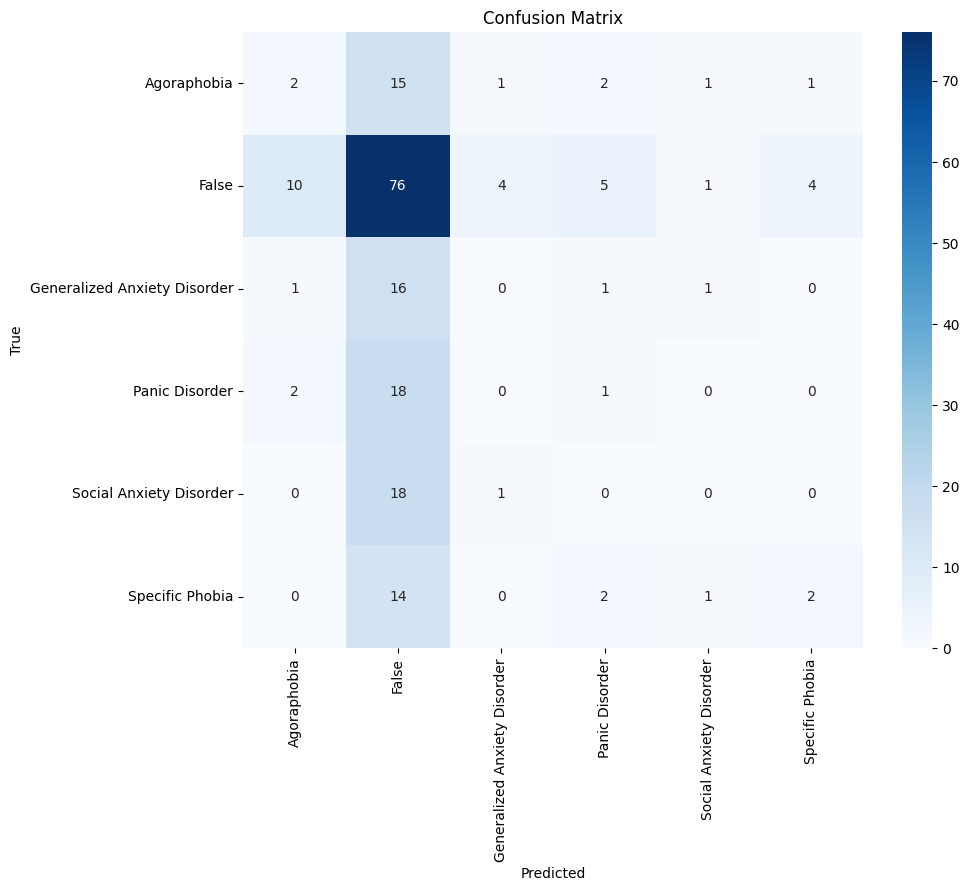

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:22:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'xgbclassifier__colsample_bytree': 0.7, 'xgbclassifier__gamma': 0.2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 9, 'xgbclassifier__subsample': 0.9}
Test Accuracy: 42.50%

Classification Report (Best Model):
                              precision    recall  f1-score   support

                 Agoraphobia       0.00      0.00      0.00        22
                       False       0.49      0.82      0.61       100
Generalized Anxiety Disorder       0.00      0.00      0.00        19
              Panic Disorder       0.09      0.05      0.06        21
     Social Anxiety Disorder       0.00      0.00      0.00        19
             Specific Phobia       0.40      0.11      0.17        19

                    accuracy                           0.42       200
                   macro avg       0.16      0.16      0.14       200
                weighted avg       0.29      0.42      0.33       200



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # Import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Updated_Anxiety_Dataset.csv')


# Preprocessing
# Convert categorical genotypes to numerical
genotype_map = {
    'Long/Long': 0, 'Short/Long': 1, 'Short/Short': 2,
    'Val/Val': 0, 'Val/Met': 1, 'Met/Met': 2,
    'Low Activity': 0, 'High Activity': 1
}

df['Genotype_5HTTLPR'] = df['Genotype_5HTTLPR'].map(genotype_map)
df['Genotype_COMT'] = df['Genotype_COMT'].map(genotype_map)
df['Genotype_MAOA'] = df['Genotype_MAOA'].map(genotype_map)

# Separate features and target
X = df.drop('AnxietyDiagnosis', axis=1)
y = df['AnxietyDiagnosis']


# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data using the encoded target
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

categorical_cols = X.select_dtypes(include='object').columns.tolist() # This will now be empty!
numerical_cols = X.select_dtypes(include=np.number).columns.tolist() # This will include the mapped genotypes

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # StandardScaler applied to numerically mapped genotypes
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # OneHotEncoder applied to an empty list of columns
    ],
    remainder='passthrough'
)

# Create pipeline with SMOTE and XGBoost
# Use y_train_encoded for training
pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    XGBClassifier(
        random_state=42,
        use_label_encoder=False, # Keep False as per XGBoost recommendation
        eval_metric='mlogloss',
        n_estimators=500,
        learning_rate=0.1,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8
    )
)

# Train model - This fits the entire pipeline, including the preprocessor
pipeline.fit(X_train, y_train_encoded)

# Predictions
y_pred_encoded = pipeline.predict(X_test)

# Decode predictions back to original labels for evaluation
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluation metrics using the original labels for report
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test_encoded, y_pred_encoded) * 100))
print("\nClassification Report:")
# Use the original y_test values (or decoded y_test_encoded) and decoded predictions
print(classification_report(label_encoder.inverse_transform(y_test_encoded), y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(label_encoder.inverse_transform(y_test_encoded), y_pred) # Use original labels for matrix display
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, # Use original class names for labels
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance
# Get feature names from preprocessing *AFTER* the pipeline has been fitted
# The preprocessor output column order is numerical followed by one-hot encoded categorical
numerical_features_processed = numerical_cols # numerical columns don't change name
cat_encoder = pipeline.named_steps['columntransformer'].named_transformers_['cat']
# Use .get_feature_names_out() with the original categorical column names

# Get feature importances
xgb = pipeline.named_steps['xgbclassifier']
importances = xgb.feature_importances_

# Hyperparameter Tuning (if needed) - Ensure param_grid keys match pipeline step names
param_grid = {
    'xgbclassifier__max_depth': [5, 7, 9],
    'xgbclassifier__learning_rate': [0.05, 0.1],
    'xgbclassifier__subsample': [0.7, 0.8, 0.9],
    'xgbclassifier__colsample_bytree': [0.7, 0.8, 0.9],
    'xgbclassifier__gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit grid search using the training data (which will fit the entire pipeline)
grid_search.fit(X_train, y_train_encoded) # Use encoded target variable for grid search

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_encoded = best_model.predict(X_test) # Predictions are encoded

# Decode predictions back to original labels for evaluation
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("\nBest Parameters:", grid_search.best_params_)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test_encoded, y_pred_encoded) * 100))
print("\nClassification Report (Best Model):")
print(classification_report(label_encoder.inverse_transform(y_test_encoded), y_pred, target_names=label_encoder.classes_))

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Updated_Anxiety_Dataset.csv')
df["AnxietyDiagnosis"].value_counts()

,count
AnxietyDiagnosis,
False,500
Agoraphobia,110
Panic Disorder,103
Social Anxiety Disorder,97
Specific Phobia,96
Generalized Anxiety Disorder,94


In [ ]:
# Preprocessing
# Convert categorical genotypes to numerical
genotype_map = {
    'Long/Long': 0, 'Short/Long': 1, 'Short/Short': 2,
    'Val/Val': 0, 'Val/Met': 1, 'Met/Met': 2,
    'Low Activity': 0, 'High Activity': 1
}

Anxiety_Diagnosis_map={
    'False':0,
    'Social Anxiety Disorder':1,
    'Panic Disorder':2,
    'Specific Phobia':3,
    'Agoraphobia':4,
    'Generalized Anxiety Disorder':5
}

df['Genotype_5HTTLPR'] = df['Genotype_5HTTLPR'].map(genotype_map)
df['Genotype_COMT'] = df['Genotype_COMT'].map(genotype_map)
df['Genotype_MAOA'] = df['Genotype_MAOA'].map(genotype_map)

df['AnxietyDiagnosis']=df['AnxietyDiagnosis'].map(Anxiety_Diagnosis_map)

In [ ]:
df.head().T

,0,1,2,3,4
Age,50.00,30.00,42.00,59.00,57.00
SleepDuration,8.30,6.70,8.40,4.80,7.80
Genotype_5HTTLPR,2.00,2.00,1.00,2.00,1.00
Genotype_COMT,2.00,0.00,0.00,1.00,0.00
Genotype_MAOA,0.00,1.00,0.00,0.00,0.00
Cortisol,20.70,7.60,18.20,14.10,23.00
Alpha_Amylase,98.60,114.20,151.20,81.50,113.10
HRV (Heart Rate Variability),93.20,53.80,82.40,63.60,47.10
GABA,0.88,0.89,1.50,0.80,1.32
IL6,0.92,3.99,4.95,2.44,0.89


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:22:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 36.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.67      0.58       100
           1       0.00      0.00      0.00        19
           2       0.11      0.10      0.10        21
           3       0.25      0.16      0.19        19
           4       0.00      0.00      0.00        22
           5       0.08      0.05      0.06        19

    accuracy                           0.36       200
   macro avg       0.16      0.16      0.16       200
weighted avg       0.30      0.36      0.33       200



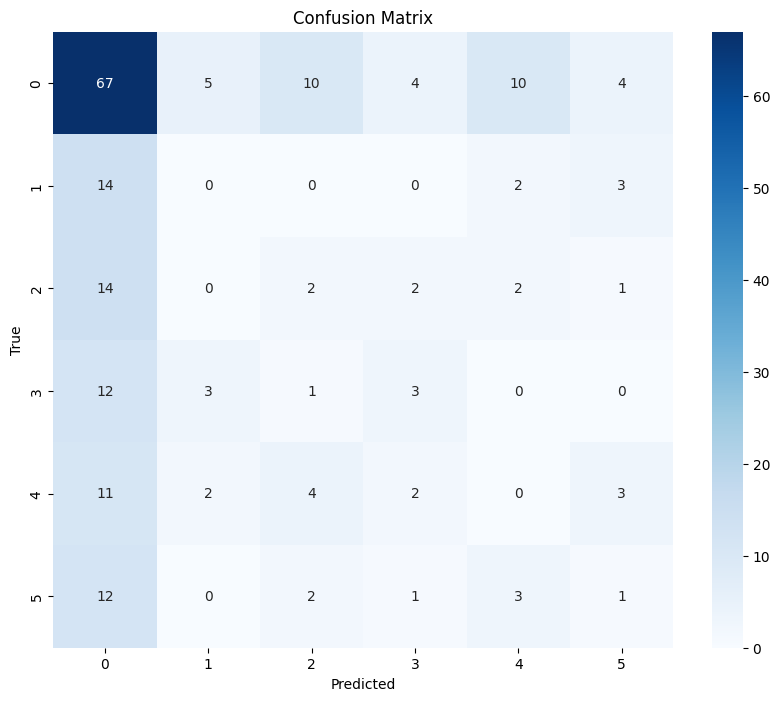

In [ ]:

# Separate features and target
X = df.drop('AnxietyDiagnosis', axis=1)
y = df['AnxietyDiagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Create pipeline with SMOTE and XGBoost
pipeline = make_pipeline(
    SMOTE(random_state=42),
    XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        n_estimators=500,
        learning_rate=0.1,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8
    )
)

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation metrics
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
#Anxiety Dataset Preview
a=pd.read_csv('/content/Updated_Anxiety_Dataset.csv')
a.head().T

,0,1,2,3,4
Age,50,30,42,59,57
SleepDuration,8.3,6.7,8.4,4.8,7.8
Genotype_5HTTLPR,Short/Short,Short/Short,Short/Long,Short/Short,Short/Long
Genotype_COMT,Met/Met,Val/Val,Val/Val,Val/Met,Val/Val
Genotype_MAOA,Low Activity,High Activity,Low Activity,Low Activity,Low Activity
Cortisol,20.7,7.6,18.2,14.1,23.0
Alpha_Amylase,98.6,114.2,151.2,81.5,113.1
HRV (Heart Rate Variability),93.2,53.8,82.4,63.6,47.1
GABA,0.88,0.89,1.5,0.8,1.32
IL6,0.92,3.99,4.95,2.44,0.89


In [ ]:
#checking shape
a.shape

(1000, 19)

In [ ]:
#value counts of target column
a["AnxietyDiagnosis"].value_counts()

,count
AnxietyDiagnosis,
False,500
Agoraphobia,110
Panic Disorder,103
Social Anxiety Disorder,97
Specific Phobia,96
Generalized Anxiety Disorder,94


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Convert string columns to categorical ordered format
for label, content in a.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        a[label] = content.astype("category").cat.as_ordered()

In [ ]:
# Save mappings from category codes to original strings
category_mappings = {
    'Genotype_5HTTLPR': dict(enumerate(a['Genotype_5HTTLPR'].cat.categories)),
    'Genotype_COMT': dict(enumerate(a['Genotype_COMT'].cat.categories)),
    'Genotype_MAOA': dict(enumerate(a['Genotype_MAOA'].cat.categories)),
    'AnxietyDiagnosis': dict(enumerate(a['AnxietyDiagnosis'].cat.categories))
}

In [ ]:
# Create new columns with codes for categorical data
a['Genotype_5HTTLPR_Codes'] = a['Genotype_5HTTLPR'].cat.codes
a['Genotype_COMT_Codes'] = a['Genotype_COMT'].cat.codes
a['Genotype_MAOA_Codes'] = a['Genotype_MAOA'].cat.codes
a['AnxietyDiagnosis_Codes'] = a['AnxietyDiagnosis'].cat.codes

In [ ]:
# Drop original string columns
a = a.drop(['Genotype_5HTTLPR', 'Genotype_COMT', 'Genotype_MAOA', 'AnxietyDiagnosis'], axis=1)

In [ ]:
# Define features and target
X = a.drop('AnxietyDiagnosis_Codes', axis=1)
y = a['AnxietyDiagnosis_Codes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
y_preds=model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        18

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Save the best model using joblib
import joblib

# Install joblib if you haven't already
!pip install joblib

joblib.dump(model, "AnxietyModel.joblib")

['AnxietyModel.joblib']

In [ ]:
#To load the model later:
anxiety_model = joblib.load("/content/AnxietyModel.joblib")

In [ ]:
for col in X.columns:
  print(col)

Age
SleepDuration
Cortisol
Alpha_Amylase
HRV (Heart Rate Variability)
GABA
IL6
TNF_alpha
Tryptophan
Vitamin_B6
Omega3_Index
HPA_Axis_Dysregulation
Sympathetic_Activation_Score
GABAergic_Function_Score
AnxietyScore_GAD7
Genotype_5HTTLPR_Codes
Genotype_COMT_Codes
Genotype_MAOA_Codes


In [ ]:
# User input function
def predict_anxiety():
    print("\nPlease enter the following details to predict the type of Anxiety Disorder:\n")
    user_input = {}

    for col in X.columns:
        if "Genotype" in col:
            original_col = col.replace("_Codes", "")
            options = list(category_mappings[original_col].values())
            print(f"{original_col} options: {options}")
            val = input(f"Enter {original_col}: ")
            while val not in options:
                print("Invalid input. Please choose from the given options.")
                val = input(f"Enter {original_col}: ")
            # Convert string to code
            code = list(category_mappings[original_col].keys())[options.index(val)]
            user_input[col] = code
        else:
            while True:
                try:
                    val = float(input(f"Enter {col}: "))
                    user_input[col] = val
                    break
                except ValueError:
                    print("Invalid number. Try again.")

    # Convert input to DataFrame
    input_df = pd.DataFrame([user_input])

    # Make prediction
    prediction_code = anxiety_model.predict(input_df)[0]
    prediction_label = category_mappings['AnxietyDiagnosis'][prediction_code]

    print("\n🎯 Predicted Anxiety Diagnosis:", prediction_label)
    return prediction_label

In [ ]:
predict_anxiety()


Please enter the following details to predict the type of Anxiety Disorder:

Enter Age: 23
Enter SleepDuration: 4
Enter Cortisol: 21
Enter Alpha_Amylase: 43
Enter HRV (Heart Rate Variability): 54
Enter GABA: 12
Enter IL6: 54
Enter TNF_alpha: 11
Enter Tryptophan: 64
Enter Vitamin_B6: 3
Enter Omega3_Index: 11
Enter HPA_Axis_Dysregulation: 87
Enter Sympathetic_Activation_Score: 35
Enter GABAergic_Function_Score: 23
Enter AnxietyScore_GAD7: 6
Genotype_5HTTLPR options: ['Long/Long', 'Short/Long', 'Short/Short']
Enter Genotype_5HTTLPR: Long/Long
Genotype_COMT options: ['Met/Met', 'Val/Met', 'Val/Val']
Enter Genotype_COMT: Met/Met
Genotype_MAOA options: ['High Activity', 'Low Activity']
Enter Genotype_MAOA: High Acitivty
Invalid input. Please choose from the given options.
Enter Genotype_MAOA: High Activity

🎯 Predicted Anxiety Diagnosis: False


'False'

In [ ]:
import joblib

# Save model
joblib.dump(model, "AnxietyModel.joblib")

# Save mappings and column structure
joblib.dump({
    'category_mappings': category_mappings,
    'columns': X.columns.tolist()
}, "AnxietyMetadata.joblib")


['AnxietyMetadata.joblib']